In [1]:
#import the dependencies
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Load the data set
df = pd.read_csv(r"C:\Users\MyPC\Desktop\dataset_nn.csv")
df.head()

,cijena,stanje,broj_kvadrata,sprat,namjesten,broj_soba,grijanje
0,35000.0,0,40.0,-1,0.0,1.0,1
1,180000.0,0,65.0,-1,0.0,2.0,1
2,73000.0,0,38.0,-1,0.0,2.0,2
3,88000.0,0,68.0,-1,0.0,3.0,2
4,95000.0,0,68.0,-1,0.0,3.0,2


In [3]:
#Convert the data into an array
dataset = df.values
dataset

array([[3.50e+04, 0.00e+00, 4.00e+01, ..., 0.00e+00, 1.00e+00, 1.00e+00],
       [1.80e+05, 0.00e+00, 6.50e+01, ..., 0.00e+00, 2.00e+00, 1.00e+00],
       [7.30e+04, 0.00e+00, 3.80e+01, ..., 0.00e+00, 2.00e+00, 2.00e+00],
       ...,
       [1.30e+05, 0.00e+00, 5.00e+01, ..., 1.00e+00, 2.00e+00, 2.00e+00],
       [1.65e+05, 0.00e+00, 7.20e+01, ..., 1.00e+00, 3.00e+00, 2.00e+00],
       [1.95e+05, 0.00e+00, 7.60e+01, ..., 1.00e+00, 4.00e+00, 2.00e+00]])

In [4]:
df.isnull().any() 

cijena           False
stanje           False
broj_kvadrata    False
sprat            False
namjesten        False
broj_soba        False
grijanje         False
dtype: bool

In [5]:
#Split the data set 
X = dataset[:,1:8] #train data
Y = dataset[:,0]   #test data

In [6]:
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[-1.        , -0.96414653, -1.        , -1.        , -0.6       ,
        -1.        ],
       [-1.        , -0.92517537, -1.        , -1.        , -0.2       ,
        -1.        ],
       [-1.        , -0.96726422, -1.        , -1.        , -0.2       ,
        -0.5       ],
       ...,
       [-1.        , -0.94855807,  0.9       ,  1.        , -0.2       ,
        -0.5       ],
       [-1.        , -0.91426345,  1.        ,  1.        ,  0.2       ,
        -0.5       ],
       [-1.        , -0.90802806,  1.        ,  1.        ,  0.6       ,
        -0.5       ]])

In [7]:

#Split the data into 80% training and 20% (testing (10%) and validation (10%))
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#the training set has 1787 data points while the validation and test set has 223 data points each. The X variables have 6 input features, while the Y variables has one feature to predict.
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1787, 6) (223, 6) (224, 6) (1787,) (223,) (224,)


In [8]:
#Build the model and architecture of the deep neural network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
# how well the model did on training , and then try to improve on it using the optimizer
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
#Train the model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
56/56 [==============================] - 2s 29ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+0

Epoch 58/100
56/56 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 59/100
56/56 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 61/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 62/100
56/56 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 63/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 64/100
56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

In [11]:
#output the accuracy
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00


0.0

In [12]:
#Make a prediction
prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(Y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 95000. 101000. 262000. 398000. 235000. 142900. 135000. 226000. 450000.
  74000. 150000. 120000. 250000.  75000. 169000. 220000. 139000. 160000.
 157000.  89900.  75000. 154000. 290000. 116000. 180000. 530000. 189000.
 245000. 185000.  98000.  85000. 125000. 198000. 137000. 125000. 130000.
  75000. 206000.  69900.  99000.  7

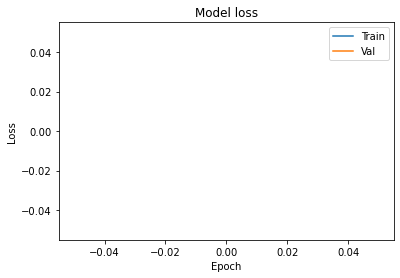

In [13]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [14]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'